# Assignment

# Data Analysis & Visualization on Haberman’s Survival Data Set

## Introduction
Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.

## Description of Dataset

There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

1. Number of Axillary nodes(Lymph Nodes) :- Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52).

2. Age :- It represent the age of patient at which they undergone surgery (age from 30 to 83).

3. Operation Year :- Year in which patient was undergone surgery(1958–1969).

4. Survival Status :- It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

#### Import Python Libraries

In [16]:
import numpy as np   # for scientific or mathematical computations

import pandas as pd   # for data manipulation

import matplotlib.pyplot as plt   # for plotting data

import seaborn as sns   # for plotting data

### Preparing the Dataset

In [17]:
df = pd.read_csv('haberman.csv', names= ['age', 'operation_age', 'axillary_nodes', 'survival_status'])

In [18]:
df

,age,operation_age,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_age    306 non-null    int64
 2   axillary_nodes   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [20]:
df.describe()

,age,operation_age,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [21]:
df.shape

(306, 4)

In [22]:
df.columns

Index(['age', 'operation_age', 'axillary_nodes', 'survival_status'], dtype='object')

In [23]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

## Exploratory Analysis and Visualization

### 2D Scatter Plot

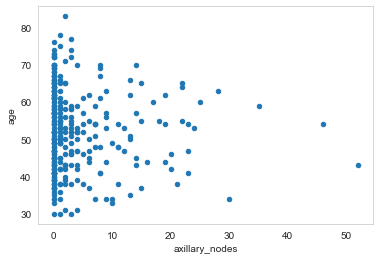

In [24]:
df.plot(kind='scatter', x='axillary_nodes', y='age') 
plt.grid()
plt.show()

Above scatter plot shows all data in overlap fashion and also in same colour due to which we are unable to distinguish between data and also there are possibilities that you may miss some of my data which may lead to wrong conclusion. So, to distinguish between the data we can use seaborn packages function which simply to distinguish data visually by allocating different colours to every classification feature.

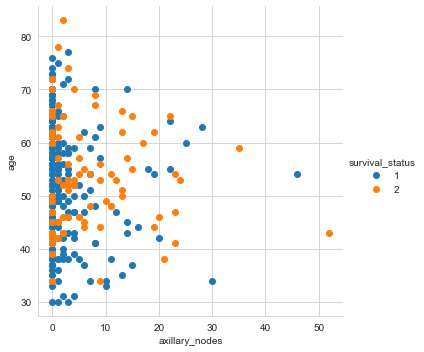

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue="survival_status", height=5) \
 .map(plt.scatter, "axillary_nodes", "age") \
 .add_legend()
plt.show()

As there are 3 features from which we can conclude our classification so how can we select any feature from all so that we can get output with less error rate. To do so we can use pairplots from seaborn to plot of various combination from which we can select best pair for our further operation and final conclusion. hue=”Survival_Status” will give on which feature you need to do classification. Below image shows the plotting of pairplots combination and code snippet for it.

### Pair Plot

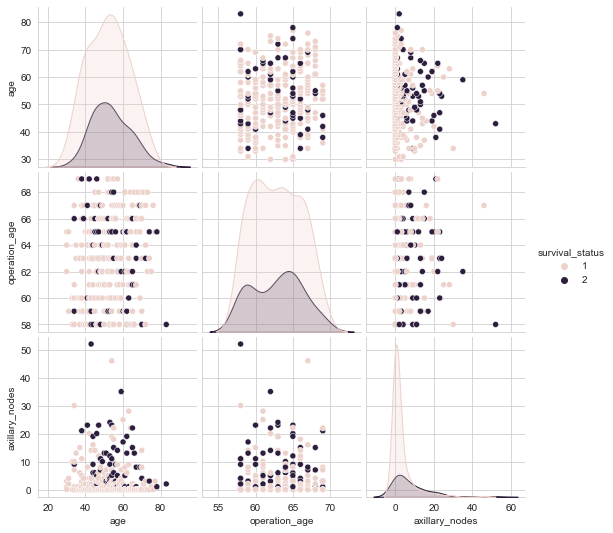

In [26]:
sns.pairplot(df, hue='survival_status', vars=['age', 'operation_age', 'axillary_nodes'])
plt.show()

Above image is the combinations plot of all features in data. These types of plot is know as pairplots. Plot 1,Plot 5 and Plot 9 are the histograms of all combinations of features which explain you the density of data by considering different features of data.

Now lets take plot 1 by 1 and I will explain you that which data feature I will take for my further data analysis. I will take such a data which can show me distinguishable difference than any other data feature. So,lets start analysing each plot except plot 1,5,9 as it is a histogram of features in pairplots. 

### 1D Scatter Plot

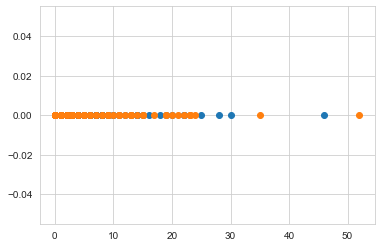

In [27]:
haberman_Long_Survive = df.loc[df['survival_status'] == 1];
haberman_Short_Survive = df.loc[df['survival_status'] == 2];
plt.plot(haberman_Long_Survive['axillary_nodes'], np.zeros_like(haberman_Long_Survive['axillary_nodes']), 'o')
plt.plot(haberman_Short_Survive['axillary_nodes'], np.zeros_like(haberman_Short_Survive['axillary_nodes']), 'o')
plt.show()

Here you can observe the data of short survival status are mostly overlap on long survival status due to which you will not able to conclude on this data.

### Box Plot and Whiskers

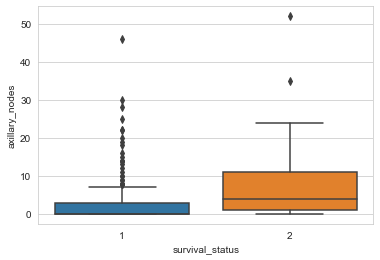

In [28]:
sns.boxplot(x='survival_status', y='axillary_nodes', data=df)
plt.show()

In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2

### Violin Plot

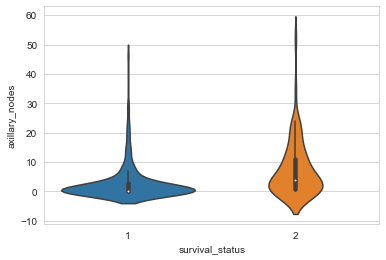

In [29]:
sns.violinplot(x='survival_status', y='axillary_nodes', data=df)
plt.show()

In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20 ans threshold from 0–12

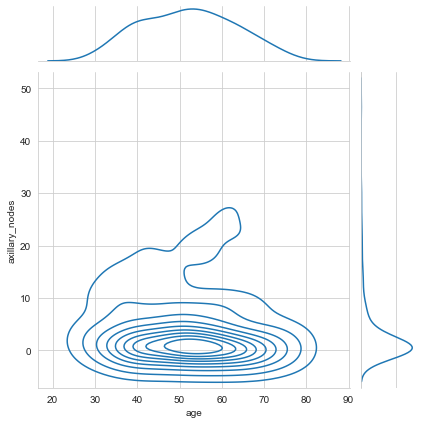

In [30]:
sns.jointplot(x='age', y='axillary_nodes', data=haberman_Long_Survive,kind= 'kde')
plt.grid()
plt.show()

Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

## Conclusion

You can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and using various Python libraries.